In [3]:
import os
os.chdir("..")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import wikipedia

warnings.filterwarnings("ignore")

In [12]:
pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

## 1. Explore UN data (manually collected)

In [29]:
df_un = pd.read_excel('data/raw/un_data.xlsx')
df_un

,Text,Source,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17
0,SDG 1,UN Descriptions,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,No poverty,UN Descriptions,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,ODA for data and...,Progress towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1549,For the period 2...,Progress towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
df_un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1550 non-null   object
 1   Source  1550 non-null   object
 2   SDG_1   1550 non-null   int64 
 3   SDG_2   1550 non-null   int64 
 4   SDG_3   1550 non-null   int64 
 5   SDG_4   1550 non-null   int64 
 6   SDG_5   1550 non-null   int64 
 7   SDG_6   1550 non-null   int64 
 8   SDG_7   1550 non-null   int64 
 9   SDG_8   1550 non-null   int64 
 10  SDG_9   1550 non-null   int64 
 11  SDG_10  1550 non-null   int64 
 12  SDG_11  1550 non-null   int64 
 13  SDG_12  1550 non-null   int64 
 14  SDG_13  1550 non-null   int64 
 15  SDG_14  1550 non-null   int64 
 16  SDG_15  1550 non-null   int64 
 17  SDG_16  1550 non-null   int64 
 18  SDG_17  1550 non-null   int64 
dtypes: int64(17), object(2)
memory usage: 230.2+ KB


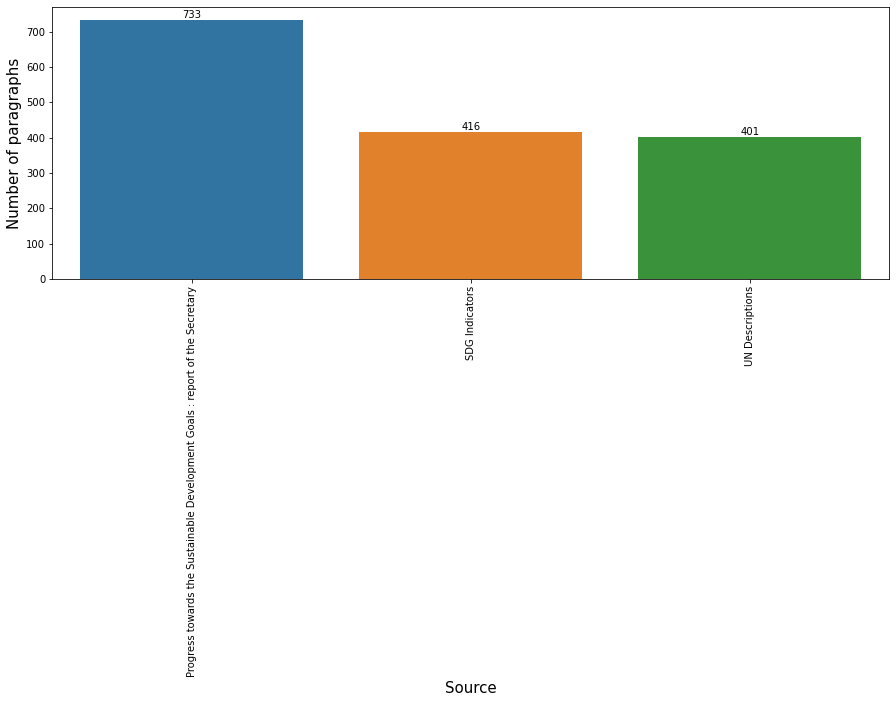

In [31]:
# Number of paragraphs per source
xs = []
ys = []
for source in df_un['Source'].unique():
    xs.append(source)
    ys.append(sum(df_un['Source'] == source))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys, order = df_un['Source'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.xlabel("Source", fontsize=15)
plt.ylabel("Number of paragraphs", fontsize=15)
plt.show()

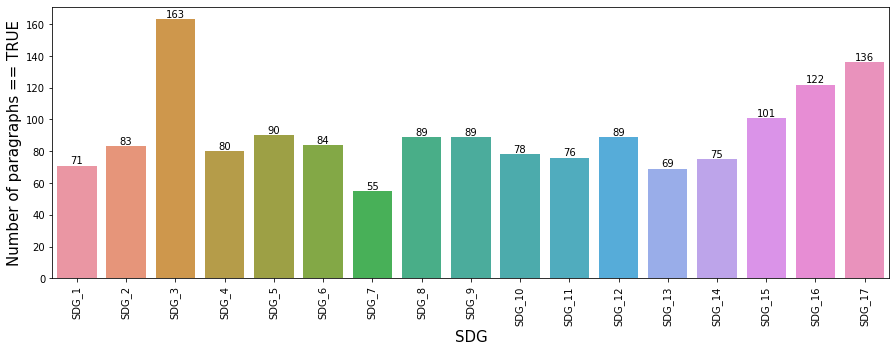

In [32]:
# Number of TRUE per SDG
xs = []
ys = []
for column in df_un.columns[2:]:
    xs.append(column)
    ys.append(sum(df_un[column] == True))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.xlabel("SDG", fontsize=15)
plt.ylabel("Number of paragraphs == TRUE", fontsize=15)
plt.show()  

## 2. Scrape Wikipedia articles associated with the SDGs

In [99]:
# Specify words/ Wikipedia pages associated with each SDG (extended from NLP for SDGs paper)

SDG_1 = [
    "Sustainable Development Goal 1",
    "social",
    "poverty",
    "extreme poverty",
    "social protection",
    "unemployment",
    "poverty threshold",
    "humanitarianism",
    "vulnerability",
]

SDG_2 = [
    "Sustainable Development Goal 2",
    "malnutrition",
    "hunger",
    "food industry",
    "underweight",
    "famine",
    "food security",
    "agricultural productivity",
    "agriculture",
    "food",
]

SDG_3 = [
    "Sustainable Development Goal 3",
    "life expectancy",
    "mental health",
    "air pollution",
    "medicine",
    "vaccine",
    "infection",
    "health",
    "respiratory disease",
    "reproductive health",
    "healthcare",
    "diabetes",
    "disease",
    "maternal death",
    "Preventable causes of death",
    "cardiovascular disease",
]

SDG_4 = [
    "Sustainable Development Goal 4",
    "teacher",
    "secondary school",
    "primary school",
    "Inclusion (education)",
    "literacy",
    "numeracy",
    "higher education",
    "school",
    "learning",
    "vocational school",
    "vocational education",
]

SDG_5 = [
    "Sustainable Development Goal 5",
    "domestic worker",
    "rights",
    "sexual violence",
    "woman",
    "girl",
    "discrimination",
    "reproductive health",
    "marriage",
    "gender equality",
    "gender parity",
    "child marriage",
    "gender",
]

SDG_6 = [
    "Sustainable Development Goal 6",
    "sanitation",
    "drinking water",
    "drink",
    "wastewater",
    "water scarcity",
    "hygiene",
    "water",
    "Fresh water",
    "Hand washing",
    "resource management",
    "Water resources",
]

SDG_7 = [
    "Sustainable Development Goal 7",
    "energy",
    "technology",
    "renewable energy",
    "infrastructure",
    "electricity",
    "solar energy",
    "solar power",
    "wind power",
    "thermal power station",
    "efficient energy use",
    "greenhouse gas",
    "fossil fuel",
    "pollution",
    "sustainable energy",
    "Electrification",
]

SDG_8 = [
    "Sustainable Development Goal 8",
    "Work (human activity)",
    "employment",
    "Gross domestic product",
    "unemployment",
    "economic growth",
    "productivity",
    "slavery",
    "forced labour",
    "workforce",
    "trade union",
    "human rights",
    "informal economy",
    "workforce productivity",
    "secure work",
    "gender pay gap",
    "decent work",
    "child labour",
]

SDG_9 = [
    "Sustainable Development Goal 9",
    "real estate development",
    "land development",
    "green development",
    "industry (economics)",
    "infrastructure",
    "transport",
    "technological progress (economics)",
    "telecommunications",
    "sustainable development",
    "sustainable industries",
    "innovation",
    "entrepreneurship",
    "information access",
    "internet access",
    "developing country",
    "manufacturing",
    "resilient infrastructure",
]

SDG_10 = [
    "Sustainable Development Goal 10",
    "income",
    "population",
    "economic inequality",
    "human migration",
    "indigenous rights",
    "migrant worker",
    "economic migrant",
    "geographic mobility",
    "wealth",
    "least developed countries",
    "development aid",
]

SDG_11 = [
    "Sustainable Development Goal 11",
    "city",
    "urban area",
    "disaster",
    "sustainable city",
    "affordable housing",
    "public housing",
    "public transport",
    "public space",
    "urban planning",
    "business opportunity",
    "sustainable development",
    "disability",
    "urbanization",
]

SDG_12 = [
    "Sustainable Development Goal 12",
    "sustainable consumption",
    "sustainable development",
    "resource",
    "sustainable products",
    "waste minimisation",
    "efficient energy use",
    "natural resource",
    "recycling",
    "food loss and waste",
]

SDG_13 = [
    "Sustainable Development Goal 13",
    "climate",
    "disaster",
    "Greenhouse gas emissions",
    "air pollution",
    "climate change",
    "climate system",
    "greenhouse gas",
    "low-carbon economy",
    "sustainable management",
    "natural resource",
    "sea level",
    "sustainable energy",
    "paris agreement",
]

SDG_14 = [
    "Sustainable Development Goal 14",
    "marine biology",
    "marine habitats",
    "marine life",
    "marine pollution",
    "ocean",
    "fish",
    "sea",
    "water",
    "fishery",
    "overfishing",
    "coast",
    "fish stocks",
    "ocean acidification",
    "sustainable fishery",
    "Illegal, unreported and unregulated fishing",
    "fisheries management",
    "marine ecosystem",
    "fisheries subsidy",
    "marine technology",
]

SDG_15 = [
    "Sustainable Development Goal 15",
    "land degradation",
    "ecosystem",
    "deforestation",
    "animal",
    "forest management",
    "biodiversity",
    "nature conservation",
    "wildlife conservation",
    "protected area",
    "forest",
    "land",
    "species",
    "wildlife",
    "animal welfare",
    "agriculture",
]

SDG_16 = [
    "Sustainable Development Goal 16",
    "law",
    "human rights",
    "institution",
    "violence",
    "oppression",
    "Exploitation of labour",
    "global governance",
    "corruption",
    "bribery",
    "justice",
    "peace",
    "victim human",
]

SDG_17 = [
    "Sustainable Development Goal 17",
    "sustainable development",
    "innovation",
    "capacity building",
    "developing country",
    "cooperation",
    "Multilateralism",
    "partnership",
    "Political international",
    "Policy Coherence for Development",
    "development aid",
    "country",
]

In [33]:
# Get text from a Wikipedia article

def get_wikipedia_article(article_name):
    content = wikipedia.page(article_name, auto_suggest=False).content
    return content

In [91]:
# Clean text from a Wikipedia article
def clean_wikipedia_article(article_content):
    
    text_list = []
    # Split article into paragraphs
    for paragraph in article_content.split('\n='):
        # Split paragraph into title and text 
        title_text = paragraph.split('=\n')
        # If title exists
        if len(title_text) > 1:
            # Ignore non-relevant paragraphs
            if ('= Charts and tables =' in title_text[0]) | ('= See also =' in title_text[0]) | ('= Notes =' in title_text[0]) | ('= References =' in title_text[0]) | ('= Citations =' in title_text[0]) | ('= Sources =' in title_text[0]) | ('= Further reading =' in title_text[0]) | ('= External links =' in title_text[0]):
                text_list = text_list
            else:
                text_list.append(title_text[1])
        else:
            text_list.append(paragraph)
            
    # Remove linebreaks
    text_list = [text.replace('\n', '') for text in text_list]
    # Remove all non-ascii characters
    text_list = [text.encode("ascii", "ignore").decode('UTF-8') for text in text_list]
    # Drop empty paragraphs
    text_list = [text for text in text_list if len(text) > 0]
    
    return text_list

In [92]:
text_list = clean_wikipedia_article(get_wikipedia_article('poverty'))
text_list

['Poverty is the state of having little material possessions or income. Poverty can have diverse social, economic, and political causes and effects. When evaluating poverty in statistics or economics there are two main measures: Absolute poverty measures compare income against the amount needed to meet basic personal needs, such as food, clothing, and shelter. Relative poverty measures when a person cannot meet a minimum level of living standards, compared to others in the same time and place. Thus relative poverty is defined varies from one country to another, or from one society to another.Statistically, as of 2019, most people on the planet live in poverty: (in Purchasing Power Parity dollars) 85% live on less than $30 per day, two-thirds live on less than $10 per day, and 10% live on less than $1.90 per day (extreme poverty). Even when countries experience economic development, the poorest citizens of middle-income countries frequently do not gain an adequate share of their countri